In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Zadanie 1.

Za pomocą jawnej metody różnicowej znaleźć przybliżone rozwiązania zagadnienia różniczkowego 

$\begin{cases}
u_t-2u_{xx}=0 \quad &(x,t)\in(0,2)\times (0,1)\\\\
u(0,t)=u(2,t)=0 \quad &t\in(0,1)\\\\
u(x,0)=\sin(2\pi x) \quad &x\in[0,2]
\end{cases}$

którego rozwiązaniem dokładnym jest funkcja $u(x,t)=\exp(−8\pi^2t)\sin(2\pi x)$.

Jako parametry dyskretyzacji przyjmij $h=0.1, \Delta t = 0.01$ i porównaj wartości rozwiązania przybliżonego z odpowiednimi wartościami rozwiązania dokładnego dla $t=0.5$ i $x \in (0, 2)$. Ustal zakres wartości dla parametrów $h$ i $\Delta t$ pozwalających otrzymać rozwiązanie stabilne.

In [2]:
def f1_teor(x,t):
    return np.exp(-8*np.pi**2*t)*np.sin(2*np.pi*x)

In [3]:
def f1_f(x):
    return np.sin(2*np.pi*x)

In [4]:
def f1_jaw(n,m,L,T,dt,h,c,alpha,beta,func):
    xi = [h*i for i in range(n+1)]
    ti = [dt*i for i in range(m+1)]
    lamb = c*dt/h**2
    uk = np.zeros([n+1,m+1])
    for k in range(m+1):
        uk[0,k] = alpha
        uk[-1,k] = beta
    for i in range(n+1):
        uk[i,0] = func(xi[i])
    A = np.zeros([n-1,n-1])
    for i in range(n-1):
        for j in range(n-1):
            if i==j:
                A[j,i] = 1-2*lamb
            elif abs(i-j)==1:
                A[j,i] = lamb
    for k in range(m-1):
        b_new = [alpha*lamb]
        b_new.extend([0 for i in range(n-3)])
        b_new.append(lamb*beta)
        b = np.array(b_new)
        temp = uk[1:-1,k]+b
        temp2 = np.matmul(A,temp)
        uk[1:-1,k+1] = temp2
    return uk

Niestabilne rozwiązanie, ponieważ 
$$\frac{c\Delta t}{h^2}=\frac{2\cdot 0.01}{(0.1)^2}=2>\frac{1}{2}$$

In [5]:
c = 2
L = 2
T = 1
alpha = 0
beta = 0
h = 0.1
dt = 0.01
n=int(L/h)
m=int(T/dt)
y_jaw1 = f1_jaw(n,m,L,T,dt,h,c,alpha,beta,f1_f)

### $t=0.5$

In [6]:
[dt*i for i in range(m)].index(0.5)

50

In [7]:
u_jaw1 = y_jaw1[:,50]
u_true_jaw1 = [f1_teor(i,0.5) for i in np.arange(0,2,0.01)]

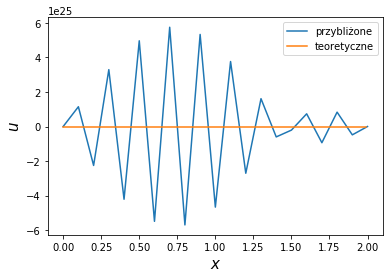

In [8]:
plt.plot([h*i for i in range(n+1)],u_jaw1, label='przybliżone')
plt.plot(np.arange(0,2,0.01),u_true_jaw1, label='teoretyczne')
plt.xlabel('$x$', size=15)
plt.ylabel('$u$', size=15)
plt.legend()
plt.show()

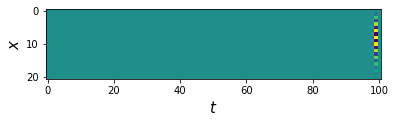

In [9]:
plt.imshow(y_jaw1)
plt.xlabel('$t$', size=15)
plt.ylabel('$x$', size=15)
plt.show()

## Zakres dla $h$ i $\Delta t$:

$$
0<\frac{c\Delta t}{h^2}<1/2 \implies 0<\frac{\Delta t}{h^2}<\frac{1}{4}
$$
$0<\Delta t<\frac{h^2}{4}$

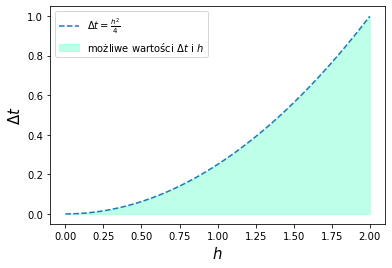

In [10]:
base = np.arange(0.001,2,0.001)
plt.plot(base, [i**2/4 for i in base], '--', label='$\Delta t = \\frac{h^2}{4}$')
plt.fill_between(base, [0 for i in base], [i**2/4 for i in base], 
                 color='aquamarine',alpha=0.5, label='możliwe wartości $\Delta t$ i $h$')
plt.xlabel('$h$', size=15)
plt.ylabel('$\Delta t$', size=15)
plt.legend()
plt.show()

### Dla $\Delta t=0.00001$ i $h=0.1$

In [11]:
c = 2
L = 2
T = 1
alpha = 0
beta = 0
h = 0.1
dt = 0.00001
n=int(L/h)
m=int(T/dt)
y_jaw2 = f1_jaw(n,m,L,T,dt,h,c,alpha,beta,f1_f)

### $t=0.5$

In [12]:
[dt*i for i in range(m)].index(0.5)

50000

In [13]:
u_jaw2 = y_jaw2[:,50000]
u_true_jaw2 = [f1_teor(i,0.5) for i in np.arange(0,2,0.01)]

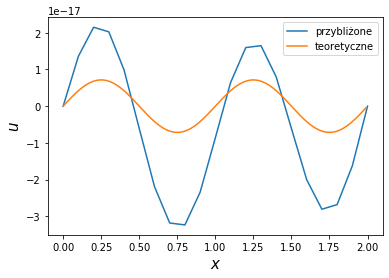

In [14]:
plt.plot([0.1*i for i in range(n+1)],u_jaw2, label='przybliżone')
plt.plot(np.arange(0,2,0.01),u_true_jaw2, label='teoretyczne')
plt.xlabel('$x$', size=15)
plt.ylabel('$u$', size=15)
plt.legend()
plt.show()

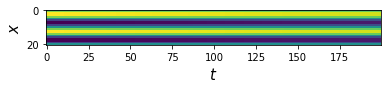

In [15]:
plt.imshow(y_jaw2[:,0:200])
plt.xlabel('$t$', size=15)
plt.ylabel('$x$', size=15)
plt.show()

### $t=0.01$

In [16]:
[dt*i for i in range(m)].index(0.01)

1000

In [19]:
u_jaw2_001 = y_jaw2[:,1000]
u_true_jaw2_001 = [f1_teor(i,0.01) for i in np.arange(0,2,0.01)]

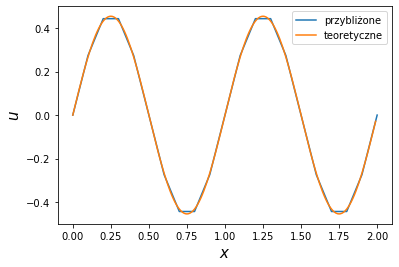

In [20]:
plt.plot([0.1*i for i in range(n+1)],u_jaw2_001, label='przybliżone')
plt.plot(np.arange(0,2,0.01),u_true_jaw2_001, label='teoretyczne')
plt.xlabel('$x$', size=15)
plt.ylabel('$u$', size=15)
plt.legend()
plt.show()

# Zadanie 2.

Za pomocą niejawnej metody różnicowej znaleźć przybliżone rozwiązania zagadnienia różniczkowego

$\begin{cases}
u_t-2u_{xx}=0 \quad &(x,t)\in(0,2)\times (0,1)\\\\
u(0,t)=u(2,t)=0 \quad &t\in(0,1)\\\\
u(x,0)=x(2-x) \quad &x\in[0,2]
\end{cases}$

którego rozwiązaniem dokładnym jest funkcja

$$
u(x,t) = \sum\limits_{n=1}^{\infty}\frac{16}{(n\pi)^3}\left(1-(-1)^n\right)\exp\left(-\frac{n^2\pi^2 t}{2}\right)\sin\left(\frac{n\pi x}{2}\right)
$$

Jako parametry dyskretyzacji przyjmij $h=0.1, \Delta t=0.01$ i porównaj wartości rozwiązania przybliżonego z odpowiednimi wartościami rozwiązania dokładnego dla $t = 0.5$ i $x\in (0, 2)$.

In [21]:
def f2_f(x):
    return x*(2-x)

In [22]:
def f2_teor2(x,t):
    temp = [16/(n*np.pi)**3*(1-(-1)**n)*np.exp(-n**2*np.pi**2*t/2)*np.sin(n*np.pi*x/2) for n in range(1,10000)]
    return sum(temp)

In [23]:
def f2_nie_jaw(n,m,L,T,dt,h,c,alpha,beta,func):
    xi = [h*i for i in range(n+1)]
    ti = [dt*i for i in range(m+1)]
    lamb = c*dt/h**2
    uk = np.zeros([n+1,m+1])
    for k in range(m+1):
        uk[0,k] = alpha
        uk[-1,k] = beta
    for i in range(n+1):
        uk[i,0] = func(xi[i])
    B = np.zeros([n-1,n-1])
    for i in range(n-1):
        for j in range(n-1):
            if i==j:
                B[j,i] = 1+2*lamb
            elif abs(i-j)==1:
                B[j,i] = -lamb
    for k in range(m):
        b_new = [alpha*lamb]
        b_new.extend([0 for i in range(n-3)])
        b_new.append(lamb*beta)
        b = np.array(b_new)
        temp = uk[1:-1,k]-b
        temp2 = np.matmul(np.linalg.inv(B),temp)
        uk[1:-1,k+1] = temp2
    return uk

In [24]:
c = 2
L = 2
T = 1
alpha = 0
beta = 0
h = 0.1
dt = 0.01
n=int(L/h)
m=int(T/dt)
y_niejaw1 = f2_nie_jaw(n,m,L,T,dt,h,c,alpha,beta,f2_f)
u_niejaw1 = y_niejaw1[:,50]

### $t=0.5$

In [25]:
u_true_niejaw1 = [f2_teor2(i,0.5) for i in np.arange(0,2.01,0.1)]

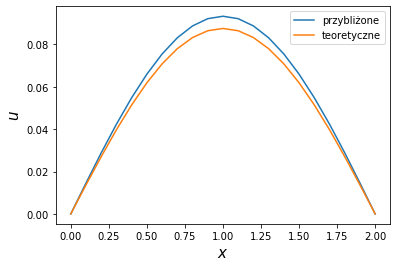

In [26]:
plt.plot([h*i for i in range(n+1)],u_niejaw1, label='przybliżone')
plt.plot(np.arange(0,2.01,0.1),u_true_niejaw1, label='teoretyczne')
plt.xlabel('$x$', size=15)
plt.ylabel('$u$', size=15)
plt.legend()
plt.show()

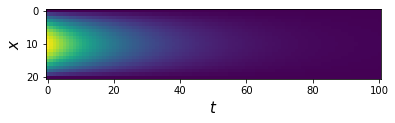

In [27]:
plt.imshow(y_niejaw1)
plt.xlabel('$t$', size=15)
plt.ylabel('$x$', size=15)
plt.show()

In [28]:
c = 2
L = 2
T = 1
alpha = 0
beta = 0
h = 0.1
dt = 0.0001
n=int(L/h)
m=int(T/dt)
y_niejaw2 = f2_nie_jaw(n,m,L,T,dt,h,c,alpha,beta,f2_f)
u_niejaw2 = y_niejaw2[:,5000]

### $t=0.5$

In [29]:
u_true_niejaw2 = [f2_teor2(i,0.5) for i in np.arange(0,2.01,0.1)]

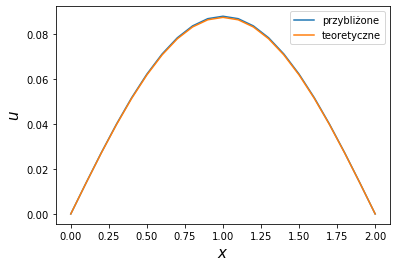

In [30]:
plt.plot([h*i for i in range(n+1)],u_niejaw2, label='przybliżone')
plt.plot(np.arange(0,2.01,0.1),u_true_niejaw2, label='teoretyczne')
plt.xlabel('$x$', size=15)
plt.ylabel('$u$', size=15)
plt.legend()
plt.show()

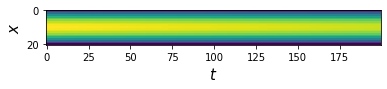

In [31]:
plt.imshow(y_niejaw2[:,:200])
plt.xlabel('$t$', size=15)
plt.ylabel('$x$', size=15)
plt.show()

# Zadanie 1.

dla niejawnej metody różnicowej

In [32]:
c = 2
L = 2
T = 1
alpha = 0
beta = 0
h = 0.1
dt = 0.01
n=int(L/h)
m=int(T/dt)
y_niejaw3 = f2_nie_jaw(n,m,L,T,dt,h,c,alpha,beta,f1_f)

### $t=0.01$

In [33]:
u_niejaw3 = y_niejaw3[:,1]
u_true_niejaw3 = [f1_teor(i,0.01) for i in np.arange(0,2,0.01)]

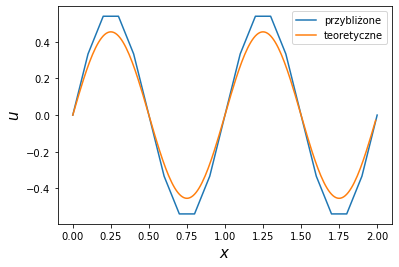

In [35]:
plt.plot([h*i for i in range(n+1)],u_niejaw3, label='przybliżone')
plt.plot(np.arange(0,2,0.01),u_true_niejaw3, label='teoretyczne')
plt.xlabel('$x$', size=15)
plt.ylabel('$u$', size=15)
plt.legend()
plt.show()

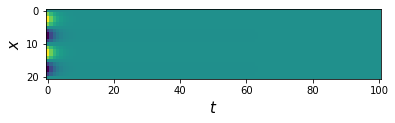

In [36]:
plt.imshow(y_niejaw3)
plt.xlabel('$t$', size=15)
plt.ylabel('$x$', size=15)
plt.show()